In [90]:
# Import Dependencies
import pandas as pd
import numpy as np
import requests
import spotipy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from spotipy.oauth2 import SpotifyClientCredentials

# Import Auth
from config import CLIENT_ID
from config import CLIENT_SECRET

In [3]:
# Beyonce
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))
bey_tracks={}
bey_track_uri=[]
bey_track_name= []
bey_track_pop=[]
bey_artist_name=[]

bey_uri='spotify:artist:6vWDO969PvNqNYHIOW5v0m'
bey_results = sp.artist_top_tracks(bey_uri, country='US')
for track in bey_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
    
    bey_track_uri.append(track['uri'])
    bey_track_name.append(track['name'])
    bey_track_pop.append(track['popularity'])
    bey_artist_name.append(track['artists'][0]['name'])   

# print(bey_track_uri, bey_track_name)
beydata=sp.audio_features(tracks=bey_track_uri)

# Slicing these indexes so that they are the same len as other audio features
bey_track_name = bey_track_name[0:9]
bey_track_pop= bey_track_pop[0:9]
bey_artist_name = bey_artist_name[0:9]


bey_tracks_tempo=[]
bey_tracks_uri=[]
bey_tracks_energy=[]
bey_tracks_loudness=[]
bey_tracks_speechiness=[]
bey_tracks_danceability = []

for bey in range(len(beydata)-1):
    bey_tracks_tempo.append(beydata[bey]['tempo'])
    bey_tracks_uri.append(beydata[bey]['uri'])
    bey_tracks_energy.append(beydata[bey]['energy'])
    bey_tracks_loudness.append(beydata[bey]['loudness'])
    bey_tracks_speechiness.append(beydata[bey]['speechiness'])
    bey_tracks_danceability.append(beydata[bey]['danceability'])

beydata_df=pd.DataFrame({
    'uri':bey_tracks_uri,
    'artist': bey_artist_name, 
    'track':bey_track_name,
    'tempo': bey_tracks_tempo,
    'energy':bey_tracks_energy,
    'loudness': bey_tracks_loudness,
    'speechiness':bey_tracks_speechiness,
    'danceability':bey_tracks_danceability,
    'popularity': bey_track_pop
    })
beydata_df

CUFF IT Beyoncé
spotify:track:1xzi1Jcr7mEi9K2RfzLOqS
BREAK MY SOUL Beyoncé
spotify:track:5pyoxDZ1PX0KxBxiRVxA4U
Crazy In Love (feat. Jay-Z) Beyoncé
spotify:track:5IVuqXILoxVWvWEPm82Jxr
Halo Beyoncé
spotify:track:3ERa3mEeOnrh2Mc47qM6T1
ALIEN SUPERSTAR Beyoncé
spotify:track:1Hohk6AufHZOrrhMXZppax
Single Ladies (Put a Ring on It) Beyoncé
spotify:track:2ZBNclC5wm4GtiWaeh0DMx
ENERGY (feat. Beam) Beyoncé
spotify:track:0314PeD1sQNonfVWix3B2K
Love On Top Beyoncé
spotify:track:1z6WtY7X4HQJvzxC4UgkSf
Irreplaceable Beyoncé
spotify:track:1G7DcLzPnopdZjLkev0K4e
If I Were a Boy Beyoncé
spotify:track:26NX1wPt1TRCH536yocd6i


,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88
1,spotify:track:5pyoxDZ1PX0KxBxiRVxA4U,Beyoncé,BREAK MY SOUL,114.942,0.887,-5.039,0.0795,0.693,75
2,spotify:track:5IVuqXILoxVWvWEPm82Jxr,Beyoncé,Crazy In Love (feat. Jay-Z),99.165,0.770,-6.596,0.2260,0.646,75
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,61
4,spotify:track:1Hohk6AufHZOrrhMXZppax,Beyoncé,ALIEN SUPERSTAR,121.892,0.641,-6.398,0.0998,0.545,75
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,62
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,71
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61


In [4]:
# Morgan Wallen
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))
mw_tracks={}
mw_tracks_uri=[]
mw_tracks_name= []
mw_track_pop=[]
mw_artist_name=[]

mw_uri='spotify:artist:4oUHIQIBe0LHzYfvXNW4QM'
mw_results = sp.artist_top_tracks(mw_uri, country='US')
for track in mw_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
    
    mw_tracks_uri.append(track['uri'])
    mw_tracks_name.append(track['name'])
    mw_track_pop.append(track['popularity'])
    mw_artist_name.append(track['artists'][0]['name'])  

# Pull various audio data points from artist's top tracks
mwdata=sp.audio_features(tracks=mw_tracks_uri)

# Slicing these indexes so that they are the same len as other audio features
mw_tracks_name = mw_tracks_name[0:9]
mw_track_pop= mw_track_pop[0:9]
mw_artist_name = mw_artist_name[0:9]


mw_tracks_tempo=[]
mw_tracks_uri=[]
mw_tracks_energy=[]
mw_tracks_loudness=[]
mw_tracks_speechiness=[]
mw_tracks_danceability = []

for mw in range(len(mwdata)-1):
    mw_tracks_tempo.append(mwdata[mw]['tempo'])
    mw_tracks_uri.append(mwdata[mw]['uri'])
    mw_tracks_energy.append(mwdata[mw]['energy'])
    mw_tracks_loudness.append(mwdata[mw]['loudness'])
    mw_tracks_speechiness.append(mwdata[mw]['speechiness'])
    mw_tracks_danceability.append(mwdata[mw]['danceability'])

mwdata_df=pd.DataFrame({
    'uri':mw_tracks_uri,
    'artist': mw_artist_name,
    'track':mw_tracks_name,
    'tempo': mw_tracks_tempo,
    'energy':mw_tracks_energy,
    'loudness': mw_tracks_loudness,
    'speechiness':mw_tracks_speechiness,
    'danceability':mw_tracks_danceability,
    'popularity': mw_track_pop
    })
mwdata_df

You Proof Morgan Wallen
spotify:track:5uU1uuyaUIBOiiUSQG7Wl3
Last Night Morgan Wallen
spotify:track:59uQI0PADDKeE6UZDTJEe8
Wasted On You Morgan Wallen
spotify:track:3cBsEDNhFI9E82vPj3kvi3
Thought You Should Know Morgan Wallen
spotify:track:6NHpyYvJyQsg2nXXzGYc2R
One Thing At A Time Morgan Wallen
spotify:track:6KGtAlYvgm4W9PoYabFAYE
Whiskey Glasses Morgan Wallen
spotify:track:6foY66mWZN0pSRjZ408c00
Chasin' You Morgan Wallen
spotify:track:5MwynWK9s4hlyKHqhkNn4A
More Than My Hometown Morgan Wallen
spotify:track:5OELUCYgOHKFAvCERnAvfS
Cover Me Up Morgan Wallen
spotify:track:0mKnuxVkPi5h0kuvZl44VM
I Wrote The Book Morgan Wallen
spotify:track:76FeKAU0A4dpFGrVSg2TX2


,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
0,spotify:track:5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,119.706,0.850,-4.913,0.0336,0.731,81
1,spotify:track:59uQI0PADDKeE6UZDTJEe8,Morgan Wallen,Last Night,203.853,0.675,-5.382,0.0357,0.517,80
2,spotify:track:3cBsEDNhFI9E82vPj3kvi3,Morgan Wallen,Wasted On You,196.000,0.657,-5.240,0.0318,0.505,79
3,spotify:track:6NHpyYvJyQsg2nXXzGYc2R,Morgan Wallen,Thought You Should Know,139.993,0.695,-6.174,0.0278,0.529,77
4,spotify:track:6KGtAlYvgm4W9PoYabFAYE,Morgan Wallen,One Thing At A Time,141.982,0.913,-5.126,0.0296,0.614,77
5,spotify:track:6foY66mWZN0pSRjZ408c00,Morgan Wallen,Whiskey Glasses,149.959,0.680,-4.580,0.0289,0.614,77
6,spotify:track:5MwynWK9s4hlyKHqhkNn4A,Morgan Wallen,Chasin' You,97.074,0.591,-5.785,0.0277,0.631,76
7,spotify:track:5OELUCYgOHKFAvCERnAvfS,Morgan Wallen,More Than My Hometown,126.019,0.869,-5.479,0.0462,0.620,74
8,spotify:track:0mKnuxVkPi5h0kuvZl44VM,Morgan Wallen,Cover Me Up,128.010,0.440,-8.192,0.0264,0.549,74


In [5]:
# Adele
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))
adl_tracks={}
adl_track_uri=[]
adl_track_name= []
adl_track_pop=[]
adl_artist_name=[]

adl_uri= "spotify:artist:4dpARuHxo51G3z768sgnrY"
adl_results = sp.artist_top_tracks(adl_uri, country='US')
for track in adl_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
    
    adl_track_uri.append(track['uri'])
    adl_track_name.append(track['name'])
    adl_track_pop.append(track['popularity'])
    adl_artist_name.append(track['artists'][0]['name'])

# Pull various audio data points from artist's top tracks
adldata=sp.audio_features(tracks=adl_track_uri)

# Slicing these indexes so that they are the same len as other audio features
adl_track_name = adl_track_name[0:9]
adl_track_pop= adl_track_pop[0:9]
adl_artist_name = adl_artist_name[0:9]

adl_tracks_tempo=[]
adl_tracks_uri=[]
adl_tracks_energy=[]
adl_tracks_loudness=[]
adl_tracks_speechiness=[]
adl_tracks_danceability = []

for adl in range(len(adldata)-1):
    adl_tracks_tempo.append(adldata[adl]['tempo'])
    adl_tracks_uri.append(adldata[adl]['uri'])
    adl_tracks_energy.append(adldata[adl]['energy'])
    adl_tracks_loudness.append(adldata[adl]['loudness'])
    adl_tracks_speechiness.append(adldata[adl]['speechiness'])
    adl_tracks_danceability.append(adldata[adl]['danceability'])

adldata_df=pd.DataFrame({
    'uri':adl_tracks_uri,
    'artist': adl_artist_name,
    'track':adl_track_name,
    'tempo': adl_tracks_tempo,
    'energy':adl_tracks_energy,
    'loudness': adl_tracks_loudness,
    'speechiness':adl_tracks_speechiness,
    'danceability':adl_tracks_danceability,    
    'popularity': mw_track_pop
    })
adldata_df

Easy On Me Adele
spotify:track:46IZ0fSY2mpAiktS3KOqds
Set Fire to the Rain Adele
spotify:track:73CMRj62VK8nUS4ezD2wvi
Rolling in the Deep Adele
spotify:track:1c8gk2PeTE04A1pIDH9YMk
Someone Like You Adele
spotify:track:1zwMYTA5nlNjZxYrvBB2pV
Love In The Dark Adele
spotify:track:7B5Npv8NjjTCzk8PLpU66h
When We Were Young Adele
spotify:track:7GgWAITsYJaRM3r50rfh5w
Oh My God Adele
spotify:track:3Kkjo3cT83cw09VJyrLNwX
Make You Feel My Love Adele
spotify:track:5FgPwJ7Nh2FVmIXviKl2VF
All I Ask Adele
spotify:track:05TOt5Vz4StdjMpEdFPlvB
Hello Adele
spotify:track:62PaSfnXSMyLshYJrlTuL3


,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
0,spotify:track:46IZ0fSY2mpAiktS3KOqds,Adele,Easy On Me,141.981,0.366,-7.519,0.0282,0.604,81
1,spotify:track:73CMRj62VK8nUS4ezD2wvi,Adele,Set Fire to the Rain,107.993,0.670,-3.882,0.0249,0.603,80
2,spotify:track:1c8gk2PeTE04A1pIDH9YMk,Adele,Rolling in the Deep,104.948,0.769,-5.114,0.0298,0.730,79
3,spotify:track:1zwMYTA5nlNjZxYrvBB2pV,Adele,Someone Like You,135.187,0.319,-8.251,0.0281,0.556,77
4,spotify:track:7B5Npv8NjjTCzk8PLpU66h,Adele,Love In The Dark,109.821,0.341,-6.057,0.0309,0.331,77
5,spotify:track:7GgWAITsYJaRM3r50rfh5w,Adele,When We Were Young,144.361,0.595,-5.936,0.0496,0.376,77
6,spotify:track:3Kkjo3cT83cw09VJyrLNwX,Adele,Oh My God,88.098,0.725,-3.906,0.0460,0.534,76
7,spotify:track:5FgPwJ7Nh2FVmIXviKl2VF,Adele,Make You Feel My Love,65.180,0.172,-10.636,0.0326,0.317,74
8,spotify:track:05TOt5Vz4StdjMpEdFPlvB,Adele,All I Ask,141.916,0.280,-5.494,0.0283,0.591,74


In [6]:
# SZA
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))
sza_tracks={}
sza_tracks_uri=[]
sza_tracks_name= []
sza_track_pop=[]
sza_artist_name=[]

sza_uri="spotify:artist:7tYKF4w9nC0nq9CsPZTHyP"
sza_results = sp.artist_top_tracks(sza_uri, country='US')
for track in sza_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
    
    sza_tracks_uri.append(track['uri'])
    sza_tracks_name.append(track['name'])
    sza_track_pop.append(track['popularity'])
    sza_artist_name.append(track['artists'][0]['name'])

# Pull various audio data points from artist's top tracks
szadata=sp.audio_features(tracks=sza_tracks_uri)

# Slicing these indexes so that they are the same len as other audio features
sza_tracks_name = sza_tracks_name[0:9]
sza_track_pop= sza_track_pop[0:9]
sza_artist_name = sza_artist_name[0:9]


sza_tracks_tempo=[]
sza_tracks_uri=[]
sza_tracks_energy=[]
sza_tracks_loudness=[]
sza_tracks_speechiness=[]
sza_tracks_danceability = []

for sza in range(len(szadata)-1):
    sza_tracks_tempo.append(szadata[sza]['tempo'])
    sza_tracks_uri.append(szadata[sza]['uri'])
    sza_tracks_energy.append(szadata[sza]['energy'])
    sza_tracks_loudness.append(szadata[sza]['loudness'])
    sza_tracks_speechiness.append(szadata[sza]['speechiness'])
    sza_tracks_danceability.append(szadata[sza]['danceability'])

szadata_df=pd.DataFrame({
    'uri':sza_tracks_uri,
    'artist': sza_artist_name,
    'track':sza_tracks_name,
    'tempo': sza_tracks_tempo,
    'energy':sza_tracks_energy,
    'loudness': sza_tracks_loudness,
    'speechiness':sza_tracks_speechiness,
    'danceability':sza_tracks_danceability,
    'popularity': sza_track_pop
    })
szadata_df

Kill Bill SZA
spotify:track:1Qrg8KqiBpW07V7PNxwwwL
Nobody Gets Me SZA
spotify:track:5Y35SjAfXjjG0sFQ3KOxmm
Snooze SZA
spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2
Low SZA
spotify:track:2GAhgAjOhEmItWLfgisyOn
Shirt SZA
spotify:track:2wSTnntOPRi7aQneobFtU4
Blind SZA
spotify:track:2CSRrnOEELmhpq8iaAi9cd
Good Days SZA
spotify:track:4PMqSO5qyjpvzhlLI5GnID
Kiss Me More (feat. SZA) Doja Cat
spotify:track:3DarAbFujv6eYNliUTyqtz
All The Stars (with SZA) Kendrick Lamar
spotify:track:3GCdLUSnKSMJhs4Tj6CV3s
Love Language SZA
spotify:track:1eIXYZWEfJO3Na2LCCnIJE


,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
0,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,SZA,Kill Bill,88.980,0.735,-5.747,0.0391,0.644,91
1,spotify:track:5Y35SjAfXjjG0sFQ3KOxmm,SZA,Nobody Gets Me,99.796,0.284,-8.285,0.0285,0.358,87
2,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,SZA,Snooze,143.008,0.551,-7.231,0.1320,0.559,87
3,spotify:track:2GAhgAjOhEmItWLfgisyOn,SZA,Low,145.044,0.546,-7.234,0.0559,0.698,86
4,spotify:track:2wSTnntOPRi7aQneobFtU4,SZA,Shirt,120.009,0.512,-7.720,0.1020,0.848,82
5,spotify:track:2CSRrnOEELmhpq8iaAi9cd,SZA,Blind,114.225,0.279,-11.776,0.0373,0.461,83
6,spotify:track:4PMqSO5qyjpvzhlLI5GnID,SZA,Good Days,121.070,0.651,-8.810,0.0568,0.461,77
7,spotify:track:3DarAbFujv6eYNliUTyqtz,Doja Cat,Kiss Me More (feat. SZA),110.970,0.705,-3.463,0.0284,0.764,77
8,spotify:track:3GCdLUSnKSMJhs4Tj6CV3s,Kendrick Lamar,All The Stars (with SZA),96.924,0.633,-4.946,0.0597,0.698,81


In [7]:
# Bad Bunny
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))
bb_tracks={}
bb_tracks_uri=[]
bb_tracks_name= []
bb_track_pop=[]
bb_artist_name=[]

bb_uri="spotify:artist:4q3ewBCX7sLwd24euuV69X"
bb_results = sp.artist_top_tracks(bb_uri, country='US')
for track in bb_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
    
    bb_tracks_uri.append(track['uri'])
    bb_tracks_name.append(track['name'])
    bb_track_pop.append(track['popularity'])
    bb_artist_name.append(track['artists'][0]['name'])


bbdata=sp.audio_features(tracks=bb_tracks_uri)

# Pull various audio data points from artist's top tracks
bbdata=sp.audio_features(tracks=bb_tracks_uri)

# Slicing these indexes so that they are the same len as other audio features
bb_tracks_name = bb_tracks_name[0:9]
bb_track_pop= bb_track_pop[0:9]
bb_artist_name = bb_artist_name[0:9]



bb_tracks_tempo=[]
bb_tracks_uri=[]
bb_tracks_energy=[]
bb_tracks_loudness=[]
bb_tracks_speechiness=[]
bb_tracks_danceability = []

for bb in range(len(bbdata)-1):
    bb_tracks_tempo.append(bbdata[bb]['tempo'])
    bb_tracks_uri.append(bbdata[bb]['uri'])
    bb_tracks_energy.append(bbdata[bb]['energy'])
    bb_tracks_loudness.append(bbdata[bb]['loudness'])
    bb_tracks_speechiness.append(bbdata[bb]['speechiness'])
    bb_tracks_danceability.append(bbdata[bb]['danceability'])

bbdata_df=pd.DataFrame({
    'uri':bb_tracks_uri,
    'artist': bb_artist_name,
    'track':bb_tracks_name,
    'tempo': bb_tracks_tempo,
    'energy':bb_tracks_energy,
    'loudness': bb_tracks_loudness,
    'speechiness':bb_tracks_speechiness,
    'danceability':bb_tracks_danceability,
    'popularity': bb_track_pop
    })
bbdata_df

La Jumpa Arcángel
spotify:track:2mnXxnrX5vCGolNkaFvVeM
Me Porto Bonito Bad Bunny
spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
Tití Me Preguntó Bad Bunny
spotify:track:1IHWl5LamUGEuP4ozKQSXZ
Gato de Noche Ñengo Flow
spotify:track:54ELExv56KCAB4UP9cOCzC
Efecto Bad Bunny
spotify:track:5Eax0qFko2dh7Rl2lYs3bx
Ojitos Lindos Bad Bunny
spotify:track:3k3NWokhRRkEPhCzPmV8TW
Neverita Bad Bunny
spotify:track:31i56LZnwE6uSu3exoHjtB
Moscow Mule Bad Bunny
spotify:track:6Xom58OOXk2SoU711L2IXO
LA CANCIÓN J Balvin
spotify:track:0fea68AdmYNygeTGI4RC18
Yonaguni Bad Bunny
spotify:track:2JPLbjOn0wPCngEot2STUS


,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
0,spotify:track:2mnXxnrX5vCGolNkaFvVeM,Arcángel,La Jumpa,140.020,0.234,-14.520,0.1780,0.887,85
1,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny,Me Porto Bonito,92.005,0.712,-5.105,0.0817,0.911,90
2,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,106.672,0.715,-5.198,0.2530,0.650,89
3,spotify:track:54ELExv56KCAB4UP9cOCzC,Ñengo Flow,Gato de Noche,93.976,0.662,-3.894,0.1620,0.892,88
4,spotify:track:5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Efecto,98.047,0.475,-8.797,0.0516,0.801,88
5,spotify:track:3k3NWokhRRkEPhCzPmV8TW,Bad Bunny,Ojitos Lindos,79.928,0.686,-5.745,0.0413,0.647,88
6,spotify:track:31i56LZnwE6uSu3exoHjtB,Bad Bunny,Neverita,122.016,0.498,-7.511,0.0478,0.876,86
7,spotify:track:6Xom58OOXk2SoU711L2IXO,Bad Bunny,Moscow Mule,99.968,0.674,-5.453,0.0333,0.804,85
8,spotify:track:0fea68AdmYNygeTGI4RC18,J Balvin,LA CANCIÓN,176.089,0.646,-5.795,0.3170,0.754,84


In [8]:
# Merge Beyonce & Morgan Wallen dataframes
bey_mw_df=pd.merge(beydata_df, mwdata_df, on=['uri', 'artist', 'track', 'tempo', 'energy', 'loudness', 'speechiness', 'danceability', 'popularity'], how='outer')
bey_mw_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88
1,spotify:track:5pyoxDZ1PX0KxBxiRVxA4U,Beyoncé,BREAK MY SOUL,114.942,0.887,-5.039,0.0795,0.693,75
2,spotify:track:5IVuqXILoxVWvWEPm82Jxr,Beyoncé,Crazy In Love (feat. Jay-Z),99.165,0.770,-6.596,0.2260,0.646,75
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,61
4,spotify:track:1Hohk6AufHZOrrhMXZppax,Beyoncé,ALIEN SUPERSTAR,121.892,0.641,-6.398,0.0998,0.545,75
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,62
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,71
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61
9,spotify:track:5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,119.706,0.850,-4.913,0.0336,0.731,81


In [9]:

# Merge Adele into current dataframe
adl_mrg_df=pd.merge(bey_mw_df, adldata_df, on=['uri', 'artist', 'track', 'tempo', 'energy', 'loudness', 'speechiness', 'danceability', 'popularity'], how='outer')
adl_mrg_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88
1,spotify:track:5pyoxDZ1PX0KxBxiRVxA4U,Beyoncé,BREAK MY SOUL,114.942,0.887,-5.039,0.0795,0.693,75
2,spotify:track:5IVuqXILoxVWvWEPm82Jxr,Beyoncé,Crazy In Love (feat. Jay-Z),99.165,0.770,-6.596,0.2260,0.646,75
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,61
4,spotify:track:1Hohk6AufHZOrrhMXZppax,Beyoncé,ALIEN SUPERSTAR,121.892,0.641,-6.398,0.0998,0.545,75
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,62
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,71
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61
9,spotify:track:5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,119.706,0.850,-4.913,0.0336,0.731,81


In [10]:
# Merge SZA into current dataframe
sza_mrg_df=pd.merge(adl_mrg_df, szadata_df, on=['uri', 'artist', 'track', 'tempo', 'energy', 'loudness', 'speechiness', 'danceability', 'popularity'], how='outer')
sza_mrg_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88
1,spotify:track:5pyoxDZ1PX0KxBxiRVxA4U,Beyoncé,BREAK MY SOUL,114.942,0.887,-5.039,0.0795,0.693,75
2,spotify:track:5IVuqXILoxVWvWEPm82Jxr,Beyoncé,Crazy In Love (feat. Jay-Z),99.165,0.770,-6.596,0.2260,0.646,75
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,61
4,spotify:track:1Hohk6AufHZOrrhMXZppax,Beyoncé,ALIEN SUPERSTAR,121.892,0.641,-6.398,0.0998,0.545,75
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,62
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,71
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61
9,spotify:track:5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,119.706,0.850,-4.913,0.0336,0.731,81


In [11]:
# Merge Bad Bunny into current dataframe to make master track df
master_track_df=pd.merge(sza_mrg_df, bbdata_df, on=['uri', 'artist', 'track', 'tempo', 'energy', 'loudness', 'speechiness', 'danceability', 'popularity'], how='outer')
master_track_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88
1,spotify:track:5pyoxDZ1PX0KxBxiRVxA4U,Beyoncé,BREAK MY SOUL,114.942,0.887,-5.039,0.0795,0.693,75
2,spotify:track:5IVuqXILoxVWvWEPm82Jxr,Beyoncé,Crazy In Love (feat. Jay-Z),99.165,0.770,-6.596,0.2260,0.646,75
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,61
4,spotify:track:1Hohk6AufHZOrrhMXZppax,Beyoncé,ALIEN SUPERSTAR,121.892,0.641,-6.398,0.0998,0.545,75
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,62
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,71
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61
9,spotify:track:5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,119.706,0.850,-4.913,0.0336,0.731,81


In [36]:
# Sort by popularity
sorted_master_df = master_track_df.sort_values(['popularity'], ascending=False)
sorted_master_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
27,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,SZA,Kill Bill,88.980,0.735,-5.747,0.0391,0.644,91
37,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny,Me Porto Bonito,92.005,0.712,-5.105,0.0817,0.911,90
38,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,106.672,0.715,-5.198,0.2530,0.650,89
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88
41,spotify:track:3k3NWokhRRkEPhCzPmV8TW,Bad Bunny,Ojitos Lindos,79.928,0.686,-5.745,0.0413,0.647,88
40,spotify:track:5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Efecto,98.047,0.475,-8.797,0.0516,0.801,88
39,spotify:track:54ELExv56KCAB4UP9cOCzC,Ñengo Flow,Gato de Noche,93.976,0.662,-3.894,0.1620,0.892,88
29,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,SZA,Snooze,143.008,0.551,-7.231,0.1320,0.559,87
28,spotify:track:5Y35SjAfXjjG0sFQ3KOxmm,SZA,Nobody Gets Me,99.796,0.284,-8.285,0.0285,0.358,87
42,spotify:track:31i56LZnwE6uSu3exoHjtB,Bad Bunny,Neverita,122.016,0.498,-7.511,0.0478,0.876,86


The r-value is:-0.22589406525380312


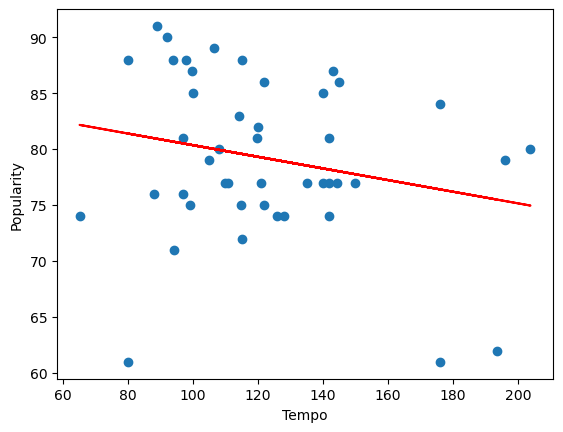

In [115]:
#all songs pop vs tempo
x_values = sorted_master_df['tempo']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.0944627350188154


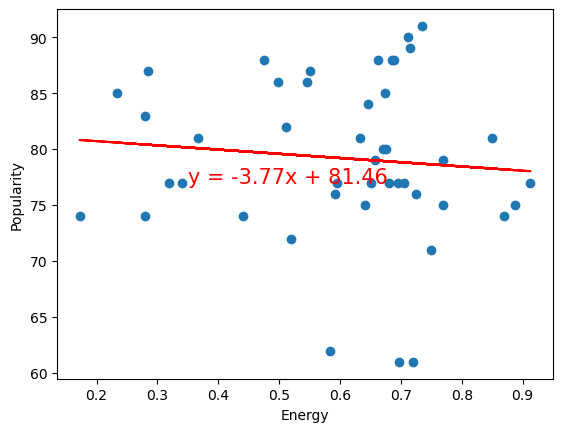

In [126]:
#all songs pop vs Energy
x_values = sorted_master_df['energy']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.35,77),fontsize=15,color="red")
plt.xlabel('Energy')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.14814867163213133


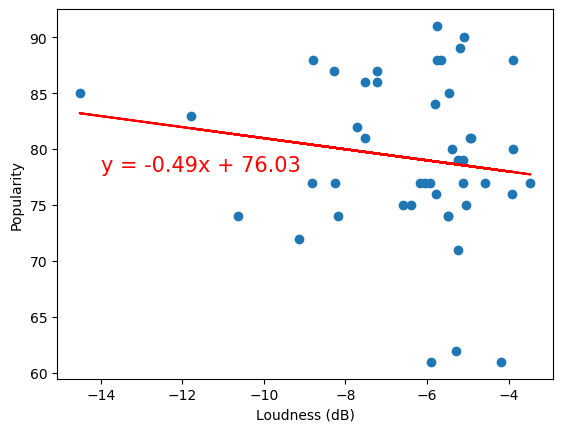

In [123]:
#all songs pop vs loudness
x_values = sorted_master_df['loudness']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-14,78),fontsize=15,color="red")
plt.xlabel('Loudness (dB)')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.19425093789727363


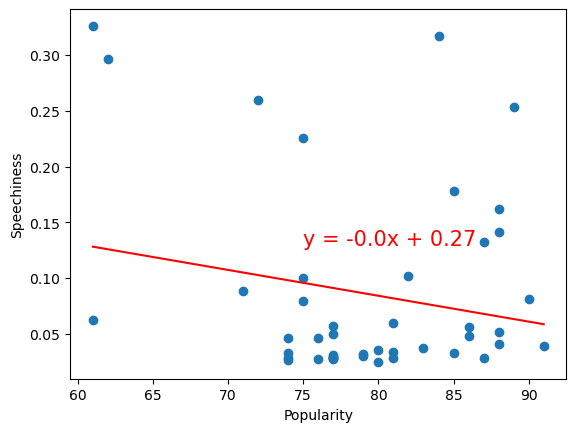

In [121]:
#top tier pop vs speechiness
x_values = sorted_master_df['popularity']
y_values = sorted_master_df['speechiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,0.13),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('Speechiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.41042780026791864


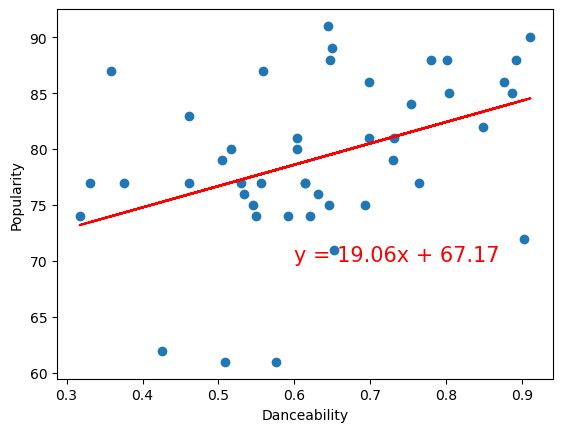

In [122]:
#all songs pop vs danceability
x_values = sorted_master_df['danceability']
y_values = sorted_master_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.6,70),fontsize=15,color="red")
plt.xlabel('Danceability')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

In [46]:
#create top tier
top_tier_songs_df = sorted_master_df.loc[sorted_master_df['popularity'] >= 86]
top_tier_songs_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
27,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,SZA,Kill Bill,88.980,0.735,-5.747,0.0391,0.644,91
37,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny,Me Porto Bonito,92.005,0.712,-5.105,0.0817,0.911,90
38,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,106.672,0.715,-5.198,0.2530,0.650,89
0,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,CUFF IT,115.042,0.689,-5.668,0.1410,0.780,88
41,spotify:track:3k3NWokhRRkEPhCzPmV8TW,Bad Bunny,Ojitos Lindos,79.928,0.686,-5.745,0.0413,0.647,88
40,spotify:track:5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Efecto,98.047,0.475,-8.797,0.0516,0.801,88
39,spotify:track:54ELExv56KCAB4UP9cOCzC,Ñengo Flow,Gato de Noche,93.976,0.662,-3.894,0.1620,0.892,88
29,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,SZA,Snooze,143.008,0.551,-7.231,0.1320,0.559,87
28,spotify:track:5Y35SjAfXjjG0sFQ3KOxmm,SZA,Nobody Gets Me,99.796,0.284,-8.285,0.0285,0.358,87
42,spotify:track:31i56LZnwE6uSu3exoHjtB,Bad Bunny,Neverita,122.016,0.498,-7.511,0.0478,0.876,86


The r-value is:-0.659077014146074


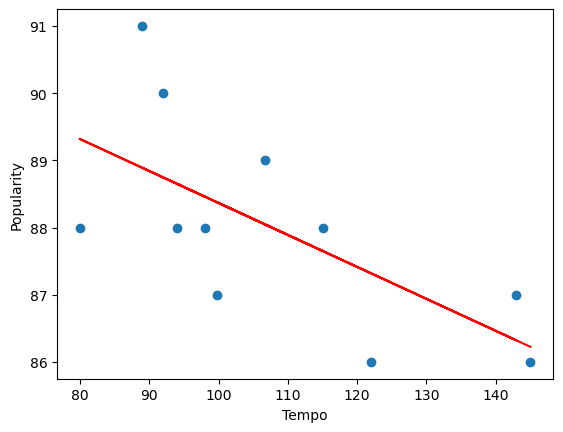

In [111]:
#top tier pop vs tempo
x_values = top_tier_songs_df['tempo']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,120),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.6582833122362981


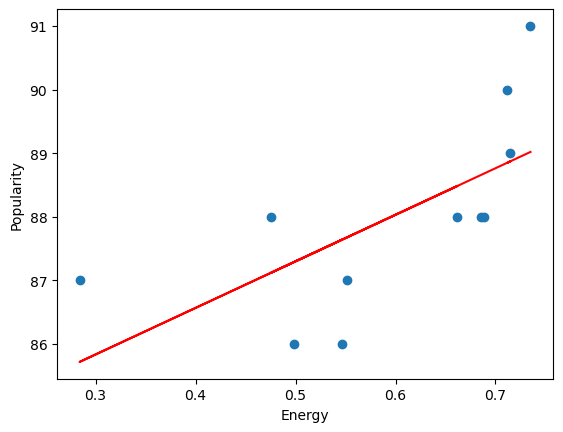

In [112]:
#top tier pop vs Energy
x_values = top_tier_songs_df['energy']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,0.5),fontsize=15,color="red")
plt.xlabel('Energy')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.5292686314399484


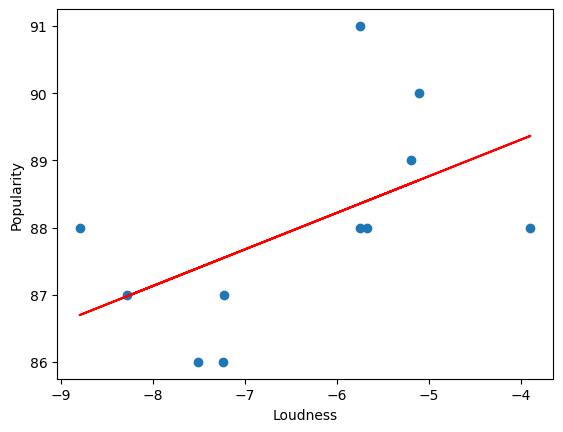

In [113]:
#top tier pop vs loudness
x_values = top_tier_songs_df['loudness']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,-7),fontsize=15,color="red")
plt.xlabel('Loudness')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.1526188829774316


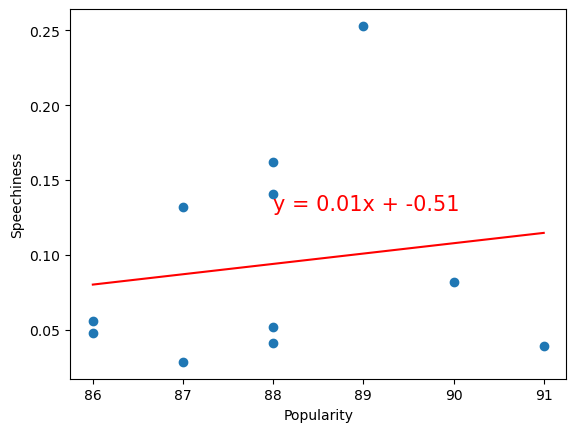

In [56]:
#top tier pop vs speechiness
x_values = top_tier_songs_df['popularity']
y_values = top_tier_songs_df['speechiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,0.13),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('Speechiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.1324301051095708


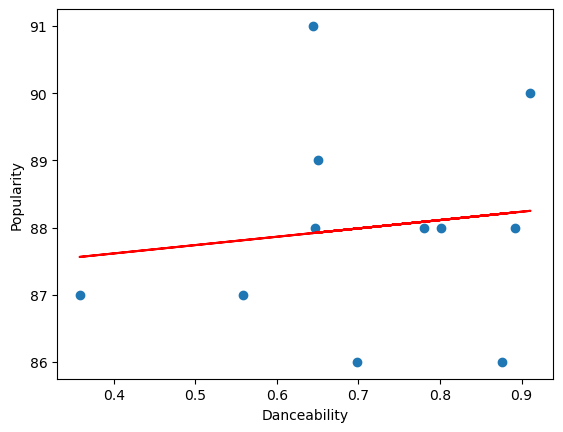

In [114]:
#top tier pop vs danceability
x_values = top_tier_songs_df['danceability']
y_values = top_tier_songs_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(88,0.6),fontsize=15,color="red")
plt.xlabel('Danceability')
plt.ylabel('Popularity')
print(f"The r-value is:{rvalue}")
plt.show()

In [80]:
#calculate mean for top tier categories
top_tier_popularity_mean = top_tier_songs_df['popularity'].mean()
top_tier_tempo_mean = top_tier_songs_df['tempo'].mean()
top_tier_loudness_mean = top_tier_songs_df['loudness'].mean()
top_tier_energy_mean = top_tier_songs_df['energy'].mean()
top_tier_speechiness_mean = top_tier_songs_df['speechiness'].mean()
top_tier_danceability_mean = top_tier_songs_df['danceability'].mean()

In [81]:
top_tier_mean_df = pd.DataFrame({
    "Top Tier Popularity Mean":[top_tier_popularity_mean],
    "Top Tier Tempo Mean":[top_tier_tempo_mean],
    "Top Tier Loudness Mean": [top_tier_loudness_mean],
    "Top Tier Energy Mean":[top_tier_energy_mean],
    "Top Tier Speechiness Mean":[top_tier_speechiness_mean],
    "Top Tier Danceability Mean":[top_tier_danceability_mean]
})
top_tier_mean_df

,Top Tier Popularity Mean,Top Tier Tempo Mean,Top Tier Loudness Mean,Top Tier Energy Mean,Top Tier Speechiness Mean,Top Tier Danceability Mean
0,88.0,107.683091,-6.401364,0.595727,0.093991,0.710545


In [63]:
#create second tier
second_tier_songs_df = sorted_master_df.loc[(sorted_master_df['popularity'] < 86) & (sorted_master_df['popularity'] >= 80)]
second_tier_songs_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
43,spotify:track:6Xom58OOXk2SoU711L2IXO,Bad Bunny,Moscow Mule,99.968,0.674,-5.453,0.0333,0.804,85
36,spotify:track:2mnXxnrX5vCGolNkaFvVeM,Arcángel,La Jumpa,140.020,0.234,-14.520,0.1780,0.887,85
44,spotify:track:0fea68AdmYNygeTGI4RC18,J Balvin,LA CANCIÓN,176.089,0.646,-5.795,0.3170,0.754,84
32,spotify:track:2CSRrnOEELmhpq8iaAi9cd,SZA,Blind,114.225,0.279,-11.776,0.0373,0.461,83
31,spotify:track:2wSTnntOPRi7aQneobFtU4,SZA,Shirt,120.009,0.512,-7.720,0.1020,0.848,82
9,spotify:track:5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,119.706,0.850,-4.913,0.0336,0.731,81
35,spotify:track:3GCdLUSnKSMJhs4Tj6CV3s,Kendrick Lamar,All The Stars (with SZA),96.924,0.633,-4.946,0.0597,0.698,81
18,spotify:track:46IZ0fSY2mpAiktS3KOqds,Adele,Easy On Me,141.981,0.366,-7.519,0.0282,0.604,81
19,spotify:track:73CMRj62VK8nUS4ezD2wvi,Adele,Set Fire to the Rain,107.993,0.670,-3.882,0.0249,0.603,80
10,spotify:track:59uQI0PADDKeE6UZDTJEe8,Morgan Wallen,Last Night,203.853,0.675,-5.382,0.0357,0.517,80


In [82]:
#calculate mean for second tier categories
second_tier_popularity_mean = second_tier_songs_df['popularity'].mean()
second_tier_tempo_mean = second_tier_songs_df['tempo'].mean()
second_tier_loudness_mean = second_tier_songs_df['loudness'].mean()
second_tier_energy_mean = second_tier_songs_df['energy'].mean()
second_tier_speechiness_mean = second_tier_songs_df['speechiness'].mean()
second_tier_danceability_mean = second_tier_songs_df['danceability'].mean()

In [83]:
second_tier_mean_df = pd.DataFrame({
    "Second Tier Popularity Mean":[second_tier_popularity_mean],
    "Second Tier Tempo Mean":[second_tier_tempo_mean],
    "Second Tier Loudness Mean": [second_tier_loudness_mean],
    "Second Tier Energy Mean":[second_tier_energy_mean],
    "Second Tier Speechiness Mean":[second_tier_speechiness_mean],
    "Second Tier Danceability Mean":[second_tier_danceability_mean]
})
second_tier_mean_df

,Second Tier Popularity Mean,Second Tier Tempo Mean,Second Tier Loudness Mean,Second Tier Energy Mean,Second Tier Speechiness Mean,Second Tier Danceability Mean
0,82.2,132.0768,-7.1906,0.5539,0.08497,0.6907


In [66]:
#create third tier
third_tier_songs_df = sorted_master_df.loc[(sorted_master_df['popularity'] < 80) & (sorted_master_df['popularity'] >= 75)]
third_tier_songs_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
11,spotify:track:3cBsEDNhFI9E82vPj3kvi3,Morgan Wallen,Wasted On You,196.000,0.657,-5.240,0.0318,0.505,79
20,spotify:track:1c8gk2PeTE04A1pIDH9YMk,Adele,Rolling in the Deep,104.948,0.769,-5.114,0.0298,0.730,79
13,spotify:track:6KGtAlYvgm4W9PoYabFAYE,Morgan Wallen,One Thing At A Time,141.982,0.913,-5.126,0.0296,0.614,77
34,spotify:track:3DarAbFujv6eYNliUTyqtz,Doja Cat,Kiss Me More (feat. SZA),110.970,0.705,-3.463,0.0284,0.764,77
33,spotify:track:4PMqSO5qyjpvzhlLI5GnID,SZA,Good Days,121.070,0.651,-8.810,0.0568,0.461,77
12,spotify:track:6NHpyYvJyQsg2nXXzGYc2R,Morgan Wallen,Thought You Should Know,139.993,0.695,-6.174,0.0278,0.529,77
14,spotify:track:6foY66mWZN0pSRjZ408c00,Morgan Wallen,Whiskey Glasses,149.959,0.680,-4.580,0.0289,0.614,77
22,spotify:track:7B5Npv8NjjTCzk8PLpU66h,Adele,Love In The Dark,109.821,0.341,-6.057,0.0309,0.331,77
23,spotify:track:7GgWAITsYJaRM3r50rfh5w,Adele,When We Were Young,144.361,0.595,-5.936,0.0496,0.376,77
21,spotify:track:1zwMYTA5nlNjZxYrvBB2pV,Adele,Someone Like You,135.187,0.319,-8.251,0.0281,0.556,77


In [84]:
#calculate mean third tier categories
third_tier_popularity_mean = third_tier_songs_df['popularity'].mean()
third_tier_tempo_mean = third_tier_songs_df['tempo'].mean()
third_tier_loudness_mean = third_tier_songs_df['loudness'].mean()
third_tier_energy_mean = third_tier_songs_df['energy'].mean()
third_tier_speechiness_mean = third_tier_songs_df['speechiness'].mean()
third_tier_danceability_mean = third_tier_songs_df['danceability'].mean()

In [85]:
third_tier_mean_df = pd.DataFrame({
    "Third Tier Popularity Mean":[third_tier_popularity_mean],
    "Third Tier Tempo Mean":[third_tier_tempo_mean],
    "Third Tier Loudness Mean": [third_tier_loudness_mean],
    "Third Tier Energy Mean":[third_tier_energy_mean],
    "Third Tier Speechiness Mean":[third_tier_speechiness_mean],
    "Third Tier Danceability Mean":[third_tier_danceability_mean]
})
third_tier_mean_df

,Third Tier Popularity Mean,Third Tier Tempo Mean,Third Tier Loudness Mean,Third Tier Energy Mean,Third Tier Speechiness Mean,Third Tier Danceability Mean
0,76.733333,125.0308,-5.765,0.6626,0.054713,0.5686


In [69]:
#create bottom tier
bottom_tier_songs_df = sorted_master_df.loc[sorted_master_df['popularity'] < 75]
bottom_tier_songs_df

,uri,artist,track,tempo,energy,loudness,speechiness,danceability,popularity
26,spotify:track:05TOt5Vz4StdjMpEdFPlvB,Adele,All I Ask,141.916,0.280,-5.494,0.0283,0.591,74
17,spotify:track:0mKnuxVkPi5h0kuvZl44VM,Morgan Wallen,Cover Me Up,128.010,0.440,-8.192,0.0264,0.549,74
25,spotify:track:5FgPwJ7Nh2FVmIXviKl2VF,Adele,Make You Feel My Love,65.180,0.172,-10.636,0.0326,0.317,74
16,spotify:track:5OELUCYgOHKFAvCERnAvfS,Morgan Wallen,More Than My Hometown,126.019,0.869,-5.479,0.0462,0.620,74
6,spotify:track:0314PeD1sQNonfVWix3B2K,Beyoncé,ENERGY (feat. Beam),114.991,0.519,-9.151,0.2600,0.903,72
7,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,Beyoncé,Love On Top,94.103,0.749,-5.248,0.0886,0.652,71
5,spotify:track:2ZBNclC5wm4GtiWaeh0DMx,Beyoncé,Single Ladies (Put a Ring on It),193.437,0.584,-5.293,0.2960,0.426,62
8,spotify:track:1G7DcLzPnopdZjLkev0K4e,Beyoncé,Irreplaceable,175.906,0.697,-4.192,0.3260,0.576,61
3,spotify:track:3ERa3mEeOnrh2Mc47qM6T1,Beyoncé,Halo,79.983,0.720,-5.908,0.0628,0.508,61


In [86]:
#calculate mean bottom tier categories
bottom_tier_popularity_mean = bottom_tier_songs_df['popularity'].mean()
bottom_tier_tempo_mean = bottom_tier_songs_df['tempo'].mean()
bottom_tier_loudness_mean = bottom_tier_songs_df['loudness'].mean()
bottom_tier_energy_mean = bottom_tier_songs_df['energy'].mean()
bottom_tier_speechiness_mean = bottom_tier_songs_df['speechiness'].mean()
bottom_tier_danceability_mean = bottom_tier_songs_df['danceability'].mean()

In [87]:
bottom_tier_mean_df = pd.DataFrame({
    "Bottom Tier Popularity Mean":[bottom_tier_popularity_mean],
    "Bottom  Tier Tempo Mean":[bottom_tier_tempo_mean],
    "Bottom  Tier Loudness Mean": [bottom_tier_loudness_mean],
    "Bottom  Tier Energy Mean":[bottom_tier_energy_mean],
    "Bottom  Tier Speechiness Mean":[bottom_tier_speechiness_mean],
    "Bottom  Tier Danceability Mean":[bottom_tier_danceability_mean]
})
bottom_tier_mean_df

,Bottom Tier Popularity Mean,Bottom Tier Tempo Mean,Bottom Tier Loudness Mean,Bottom Tier Energy Mean,Bottom Tier Speechiness Mean,Bottom Tier Danceability Mean
0,69.222222,124.393889,-6.621444,0.558889,0.129656,0.571333


In [88]:
#create a series with all means ranked from most to least popular
popularity_mean_comp = [top_tier_popularity_mean,second_tier_popularity_mean,third_tier_popularity_mean,bottom_tier_popularity_mean]
tempo_mean_comp = [top_tier_tempo_mean,second_tier_tempo_mean,third_tier_tempo_mean,bottom_tier_tempo_mean]
loudness_mean_comp = [top_tier_loudness_mean,second_tier_loudness_mean,third_tier_loudness_mean,bottom_tier_loudness_mean]
energy_mean_comp = [top_tier_energy_mean,second_tier_energy_mean,third_tier_energy_mean,bottom_tier_energy_mean]
speechiness_mean_comp = [top_tier_speechiness_mean,second_tier_speechiness_mean,third_tier_speechiness_mean,bottom_tier_speechiness_mean]
danceability_mean_comp = [top_tier_danceability_mean,second_tier_danceability_mean,third_tier_danceability_mean,bottom_tier_danceability_mean]

In [109]:
tiers = ['Top Tier','Second Tier', 'Third Tier', 'Bottom Tier']

#create mean comparison dataframe
comparison_df = pd.DataFrame({
    "Tiers": tiers,
    "Popularity Mean Comparison":popularity_mean_comp,
    "Tempo Mean Comparison":tempo_mean_comp,
    "Loudness Mean Comparison": loudness_mean_comp,
    "Energy Mean Comparison":energy_mean_comp,
    "Speechiness Mean Comparison":speechiness_mean_comp,
    "Danceability Mean Comparison":danceability_mean_comp
})
comparison_df

,Tiers,Popularity Mean Comparison,Tempo Mean Comparison,Loudness Mean Comparison,Energy Mean Comparison,Speechiness Mean Comparison,Danceability Mean Comparison
0,Top Tier,88.000000,107.683091,-6.401364,0.595727,0.093991,0.710545
1,Second Tier,82.200000,132.076800,-7.190600,0.553900,0.084970,0.690700
2,Third Tier,76.733333,125.030800,-5.765000,0.662600,0.054713,0.568600
3,Bottom Tier,69.222222,124.393889,-6.621444,0.558889,0.129656,0.571333


In [110]:
#set the tier as the index
comparison_df_final = comparison_df.set_index('Tiers')
comparison_df_final

,Popularity Mean Comparison,Tempo Mean Comparison,Loudness Mean Comparison,Energy Mean Comparison,Speechiness Mean Comparison,Danceability Mean Comparison
Tiers,,,,,,
Top Tier,88.000000,107.683091,-6.401364,0.595727,0.093991,0.710545
Second Tier,82.200000,132.076800,-7.190600,0.553900,0.084970,0.690700
Third Tier,76.733333,125.030800,-5.765000,0.662600,0.054713,0.568600
Bottom Tier,69.222222,124.393889,-6.621444,0.558889,0.129656,0.571333


***Mean Comparison Analysis Section***
-The most popular songs, on average, have a lower tempo (<110) than the least popular songs
-The most popular songs have a higher mean danceability rating (>0.7)

-The least popular songs have higher speechiness rating (>0.10)
-The third tier and bottom tier popularities have lower danceability (0.56 and 0.57) than top and second tier (0.71 abd 0.69)

In [15]:
list(master_track_df.columns.values)
master_track_df=master_track_df[['artist', 'track', 'popularity', 'tempo', 'energy', 'danceability', 'loudness', 'speechiness', 'uri']]
master_track_df

,artist,track,popularity,tempo,energy,danceability,loudness,speechiness,uri
0,Beyoncé,CUFF IT,88,115.042,0.689,0.780,-5.668,0.1410,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS
1,Beyoncé,BREAK MY SOUL,75,114.942,0.887,0.693,-5.039,0.0795,spotify:track:5pyoxDZ1PX0KxBxiRVxA4U
2,Beyoncé,Crazy In Love (feat. Jay-Z),75,99.165,0.770,0.646,-6.596,0.2260,spotify:track:5IVuqXILoxVWvWEPm82Jxr
3,Beyoncé,Halo,61,79.983,0.720,0.508,-5.908,0.0628,spotify:track:3ERa3mEeOnrh2Mc47qM6T1
4,Beyoncé,ALIEN SUPERSTAR,75,121.892,0.641,0.545,-6.398,0.0998,spotify:track:1Hohk6AufHZOrrhMXZppax
5,Beyoncé,Single Ladies (Put a Ring on It),62,193.437,0.584,0.426,-5.293,0.2960,spotify:track:2ZBNclC5wm4GtiWaeh0DMx
6,Beyoncé,ENERGY (feat. Beam),72,114.991,0.519,0.903,-9.151,0.2600,spotify:track:0314PeD1sQNonfVWix3B2K
7,Beyoncé,Love On Top,71,94.103,0.749,0.652,-5.248,0.0886,spotify:track:1z6WtY7X4HQJvzxC4UgkSf
8,Beyoncé,Irreplaceable,61,175.906,0.697,0.576,-4.192,0.3260,spotify:track:1G7DcLzPnopdZjLkev0K4e
9,Morgan Wallen,You Proof,81,119.706,0.850,0.731,-4.913,0.0336,spotify:track:5uU1uuyaUIBOiiUSQG7Wl3
